In [1]:
#importing liabraries for analsis of dataset
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import skew
import matplotlib.pyplot as plt

In [2]:
#importing dataset
df=pd.read_csv('C:/Users/lenovo/Downloads/supermarket sales Sheet1.csv')
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


# Part-1:Basic analysis of data

### For knowing basic knowledge of our data we have to calculate shape and columns of dataset(df).

In [3]:
df.shape

(1000, 17)

In [4]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

### For calculating mean, std, min, max etc for each column we used describe() function.

In [5]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


### Now we have to see the datatype of each column in df we use info()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

# Part-2:

## Q1) Is your supermarket more popular with males or females? 

### To see that is our supermarket more popular with males or females we use count() because no. of males and females who are shoping from supermarket indicates that they are interested in our products or not.

In [7]:
df['Gender'].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

###       Here from our dataset we can see that there is huge number of males and females are intersested in buying in super market, so supermarket is more popular in males and females.

# Q2) What does the customer rating look like and can you also comment on its skewness?

###   We plot distplot to show distribution of 'Rating' in df and we can plot the mean and the percentiles to show this as well. The red dotted lime is the mean and the green and orange lines indicate the 25th and 75th percentiles respectively.

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


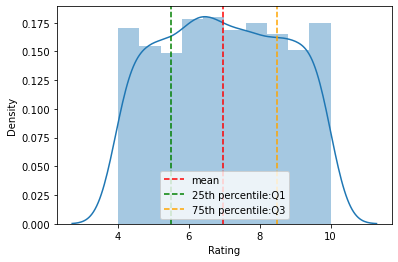

In [8]:
sns.distplot(df['Rating'])
plt.axvline(x=np.mean(df['Rating']), c='red', ls='--', label='mean')
plt.axvline(x=np.percentile(df['Rating'],25),c='green', ls='--', label = '25th percentile:Q1')
plt.axvline(x=np.percentile(df['Rating'],75),c='orange', ls='--',label = '75th percentile:Q3' )
plt.legend()

In [9]:
skew(df['Rating'],axis=0,bias=True)

0.008996128657606762

### From above distplot we can say that the rating distribution looks uniform and there seems to be no skewness on the left or right side of the distribution. Also from above we can calculate skewness that is 0.008996 which is very low so we can say that our data is not much skewed.We can see from above the mean rating is ~7 across products.

# Q.3) What can you say about the aggregate sales across the branches?

### For knowing aggregate sales across each branches first we have to see relation between gross income and branches but here one is numerical and one is categorical variable so we plot catplot between these two variables.

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


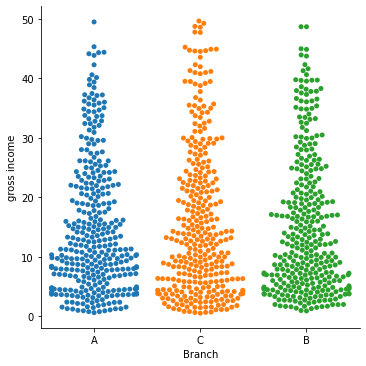

In [10]:
sns.catplot(x="Branch", y="gross income",kind="swarm", data=df)

### Now from above catplot we can see overall their is not much difference in all three branches for gross income. Now for sales we use countplot because with the use of it we can see sales of each branch and also for knowing numbers of counts we use value_counts(). 

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


A    340
B    332
C    328
Name: Branch, dtype: int64

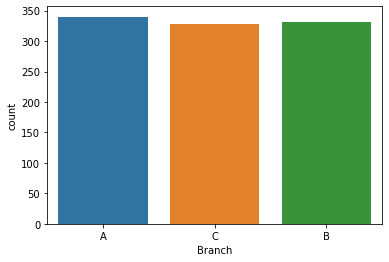

In [11]:
sns.countplot(df['Branch'])
df['Branch'].value_counts()

### Here we can see that there is not much difference in sales across the 3 branches of A, B and C. The sales in branch A is a bit higher than the rest of the branches.

# Q4) Which is the most popular payment method used by customers?

### We have to find out most popular payment method used by customers hench we have to find out payment method which is mostly used by customers. Hence we used value_counts() function to find out how many times  each payment method used and also used count plot to view it graphically.

In [12]:
df['Payment'].value_counts()

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Payment', ylabel='count'>

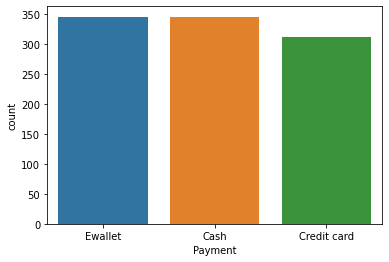

In [13]:
sns.countplot(df['Payment'])

### From above we can say that Ewallet is most popular payment method used by customer but Cash also very popular among customers.

# Part-3:

# Q1) Does gross income affect customer ratings?

### Here we have to see relation between 'gross income' and customer 'rating' hence for it we plot scatter plot between these two variables.

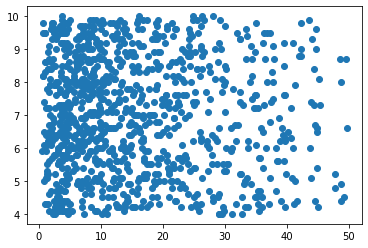

In [14]:
plt.scatter(df['gross income'],df['Rating'])
plt.show()

In [15]:
np.corrcoef(df['gross income'],df['Rating'])*100

array([[100.       ,  -3.6441705],
       [ -3.6441705, 100.       ]])

### From above we can say that correlation coefficient of gross income and Rating is -3.6 that means this two are not related linearly.Also from scatter plot we can see that their is not any kind of relation between gross income and Rating. Hence gross income could not effect the Rating of product.

# Q.2) Which is the most profitable branch?

### Here we have to see the most profitable branch so we have to find branch which has high gross income among our three branches , Hench we used boxplot between 'gross income' and 'branch'.

<AxesSubplot:xlabel='Branch', ylabel='gross income'>

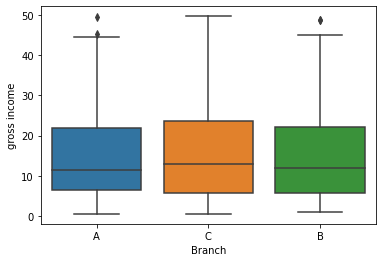

In [16]:
sns.boxplot(x=df['Branch'], y=df['gross income'])

### There is not much difference in gross income by branches at an average level. Branch C has a slightly higher income than A and B. As observed earlier,though branch A has slightly higher sales than the B.Hence Naypyitaw (c) is the most profitable branch in terms of gross income.

 # Q.3) How is the relationship between Gender and Gross income?

### We have find out relationship between 'Gender' and 'Gross income' . First we plot catplot to see distribution of 'males' and 'females' for gross income.  

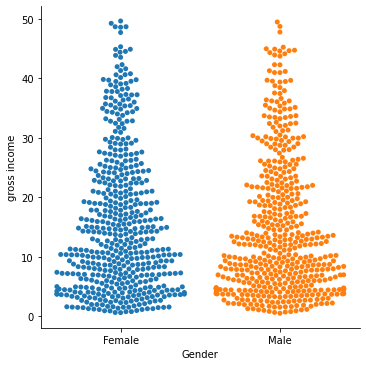

In [17]:
sns.catplot(x='Gender', y='gross income',kind='swarm', data=df)

### From catplot we can see that females has little more distribution but it's little unclear , so we plot boxplot to find exact difference between males and females on gross income.

<AxesSubplot:xlabel='Gender', ylabel='gross income'>

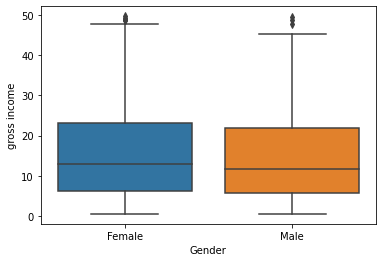

In [18]:
sns.boxplot(x=df['Gender'], y=df['gross income'])

### Gross income is similar for both male and female but female customers spend a bit higher.

# Q.4) Can you see any time trend in gross income?

### We have to see the time trend in 'gross income', so we use 'Date' column to show time trend in 'gross income' and we use mean of variables to summarise.  

<AxesSubplot:xlabel='Date', ylabel='gross income'>

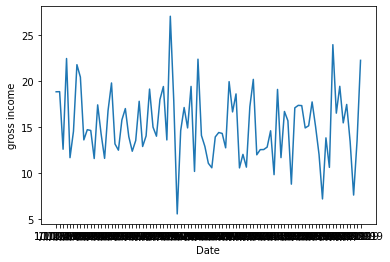

In [19]:
sns.lineplot(x= df.groupby(df.Date).mean().index, 
             y = df.groupby(df.Date).mean()['gross income'])

### Here we can see their is not much trend since line remain around some average midline level except their are some days where gross income is high or sometimes it low.

# Q.5) Which product line helps you generate the most income?

### Here we have to find out the product line which helps us generate the most income. For this we first create data(df1)  such as our two required columns and groupby it 'Product line' where not index and arrange it discending order with respect to 'gross income'. Then we plot barplot between this two columns from this new data(df1) . It gives us descending graphs of our product line with respect to 'gross income'. 

<AxesSubplot:xlabel='Product line', ylabel='gross income'>

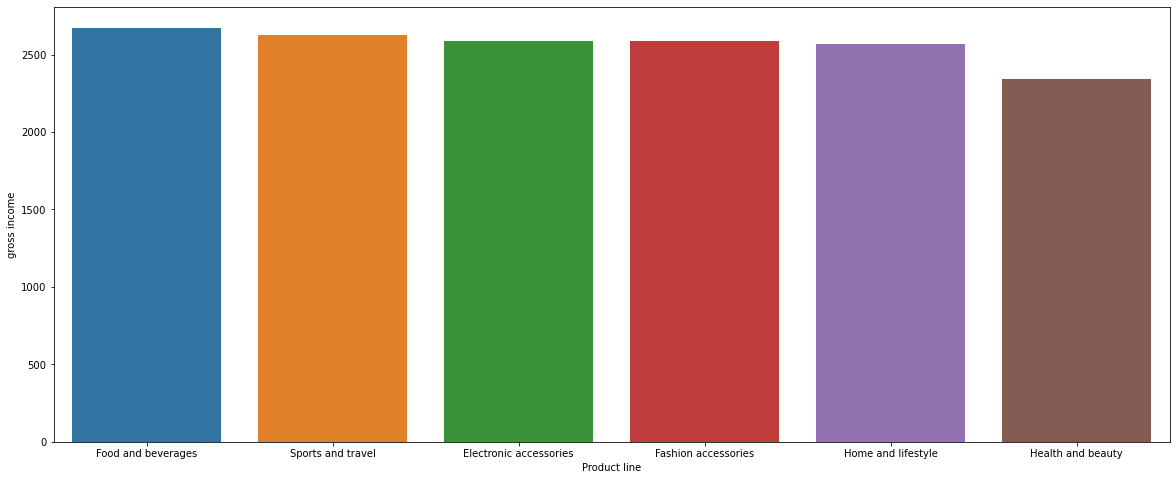

In [20]:
df1=df[["Product line", "gross income"]].groupby(['Product line'], as_index=False).sum().sort_values(by='gross income', ascending=False)
plt.figure(figsize=(20,8))
sns.barplot(x='Product line', y='gross income', data=df1)

### Gross income is highest in Food and beverages.

# Q.6) What is the spending pattern of both males and females, meaning in which category do they spend more?

### Here we have to find out in which category 'males' and 'females' spend more hence we plot countplot for 'Product line' which gives us count values for each category and divide it between 'males' and 'females' with the use of 'hue'.

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Total Monthly transaction by Gender'}, xlabel='Product line', ylabel='count'>

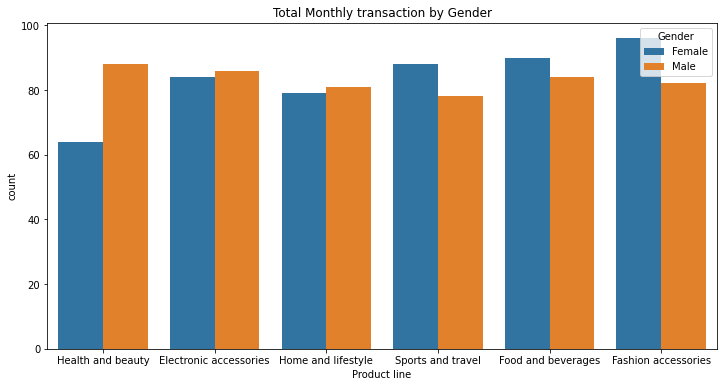

In [21]:
plt.figure(figsize=(12, 6))
plt.title('Total Monthly transaction by Gender')
sns.countplot(df['Product line'], hue = df.Gender)

 ### Females spend on 'fashion accessories' the most and for males it is 'Health and beauty'. 

# Q.7) How many products are bought by customers? 

### For finding out how many products are bought by customers, we use distplot for 'Quantity' which give us insights of distribution of quantities of product.

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Quantity', ylabel='Density'>

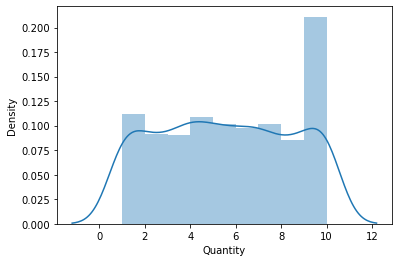

In [22]:
sns.distplot(df['Quantity'])

### From above we can see that most customer buy 10 quantities

# Q.8) Which day of the week has maximum sales?

### Here we have to find out the day of the week has maximum sales but we don't have day column .Hence we first create days column. For this we first import datetime liabrary.

In [23]:
from datetime import datetime as dt

### Now we can create day column from 'Date' column which is already present in df. but as we can see in Part-1 our dtype for 'Date' column is object, so we first convert it into datetime formate with the use of pd.to_datetime() function

In [24]:
df['Date']=pd.to_datetime(df['Date'])
df['Date']

0     2019-01-05
1     2019-03-08
2     2019-03-03
3     2019-01-27
4     2019-02-08
         ...    
995   2019-01-29
996   2019-03-02
997   2019-02-09
998   2019-02-22
999   2019-02-18
Name: Date, Length: 1000, dtype: datetime64[ns]

### Now we use dt.weekday function to convert it with days where 0 for monday and 6 for sunday and all other are like this order

In [25]:
df['Date'].dt.weekday.head()

0    5
1    4
2    6
3    6
4    4
Name: Date, dtype: int64

In [26]:
df['weekday']=df['Date'].dt.weekday
df['weekday'].unique()

array([5, 4, 6, 0, 3, 2, 1], dtype=int64)

### Now we create countplot on weekdays to colculate the no. of sales on weekays.

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Daily Sales by Day of the Week'}, xlabel='weekday', ylabel='count'>

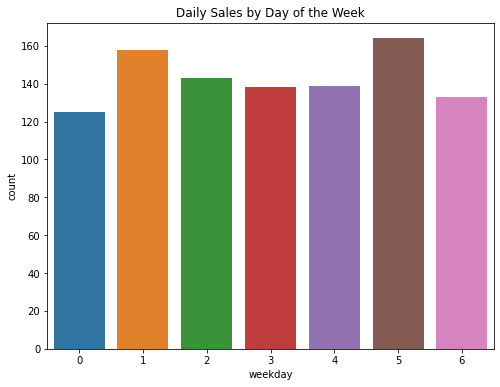

In [27]:
plt.figure(figsize=(8, 6))
plt.title('Daily Sales by Day of the Week')
sns.countplot(df['weekday'])

### Here 0-Monday and 6- Sunday so sales is highest on 5 i.e. Saturday probably because it is the weekend. Interestingly,Tuesdays is a close second.Mondays is the lowest in sales, probably because it is start of the working week

# Q.9) Which hour of the day is busiest? 

### For finding out that which hour of the day is busiest we have to create Hour column but in our df we dont have it so we have to create it. We can create hour column from 'Time' column. 'Time' column from df has object as a datatype so first we convert it into datetime and then convert it into 'hour' column with the use of dt.hour. 

In [28]:
df['Time'] = pd.to_datetime(df['Time'])
df['Hour'] = (df['Time']).dt.hour
df['Hour'].unique()

array([13, 10, 20, 18, 14, 11, 17, 16, 19, 15, 12], dtype=int64)

### Now we create lineplot between 'Hour' and 'Quantity' because if quantity of sale is more then it was buisy hour.

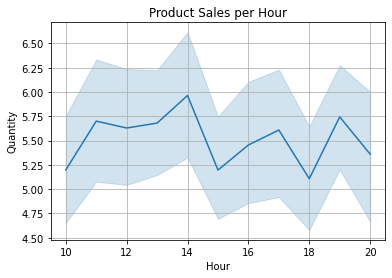

In [29]:
sns.lineplot(x="Hour",  y = 'Quantity',data =df).set_title("Product Sales per Hour")
plt.grid()

### Peak is observed in the 14th hour i.e 2 pm of the day. Hence, sales is typically higher in the afternoons

# Q.10) Which product line should your supermarket focus on?

### Here we have to find out Which product line should your supermarket focus on, so we first plot barplot between 'Product line ' and 'rating'.

<AxesSubplot:xlabel='Rating', ylabel='Product line'>

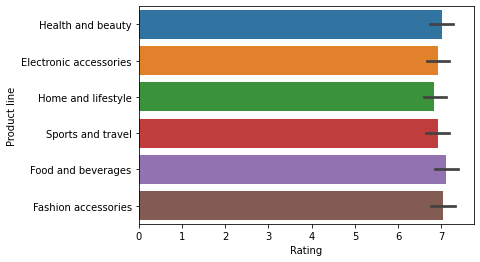

In [30]:
sns.barplot(x = df['Rating'],y = df['Product line'])

### From above we can see that ratings of 'food and beverages' and 'fashion and accessories' are high. 
### Now we plot boxplot between 'Product line' and 'Quantity' .

<AxesSubplot:xlabel='Quantity', ylabel='Product line'>

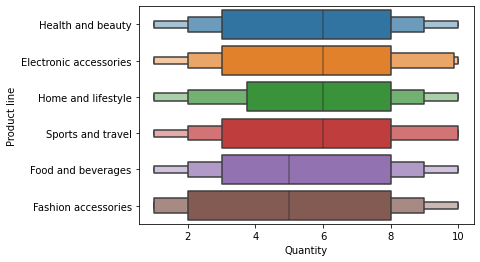

In [31]:
sns.boxenplot(y = 'Product line', x = 'Quantity', data=df )

### Though the rating for ‘fashion accessories’ and ‘food and beverages’ is high but quantity purchased is low. Hence, supply for these products need to be increased.

# Q.11) Which city should be chosen for expansion and what products should be focussed on?

### Here we have to find out which city should be chosen for expansion and what products should be focussed on, so we first plot barplot between 'City' and 'gross income'. It gives us insights of profit in each city.

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

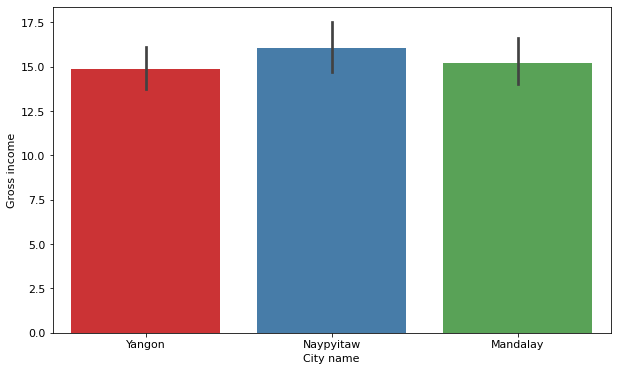

In [32]:
plt.figure(figsize=(10,6))
sns.barplot(df['City'],df['gross income'],palette='Set1')
plt.xlabel('City name',fontsize='11')
plt.xticks(fontsize='11')
plt.ylabel('Gross income',fontsize='11')
plt.yticks(fontsize='11')

### It is obvious that Naypyitaw is the most profitable city, hence the expansion plan should be based on this city.
### Now we have to find out which product should be chosen for focus on in expansion hence we use countplot on 'Product line' to calculate most saled product with respect to each city since we have the expansion planed based on Naypyitaw so we use 'hue'.

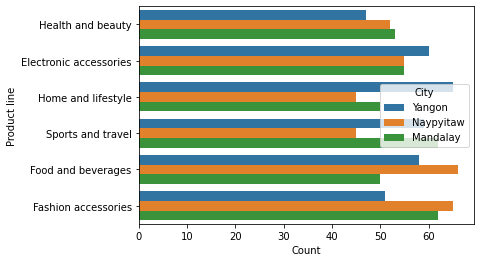

In [33]:
sns.countplot(y ='Product line', hue = "City", data = df) 
plt.xlabel('Count')
plt.show()

### Fashion accessories and food and beverages are the most sold product in Naypyitaw and these products should be focused on for expansion along with electronic accessories.